In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "Dataset .csv"
dataset = pd.read_csv(file_path)

In [43]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 1 

# Task 1 : Data Exploration and Preprocessing

# Explore the dataset and identify the number of rows and columns

In [21]:
print("\nColumn Information:\n", dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
print("Dataset contains", dataset.shape[0], "rows and", dataset.shape[1], "columns")

Dataset contains 9551 rows and 21 columns


# Check for missing values in each column and handle them accordingly.


In [28]:
print("\nMissing Values per Column:\n", dataset.isnull().sum())


Missing Values per Column:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [33]:
# Since only 'Cuisines' column has missing values, we fill them with 'Unknown'
dataset["Cuisines"] = dataset["Cuisines"].fillna("Unknown")

In [53]:
print("\n Column after handling missing values:\n", dataset.isnull().sum())


 Column after handling missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# Perform data type conversion if necessary.

In [58]:
print("\nData Types:\n", dataset.dtypes)


Data Types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


# Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

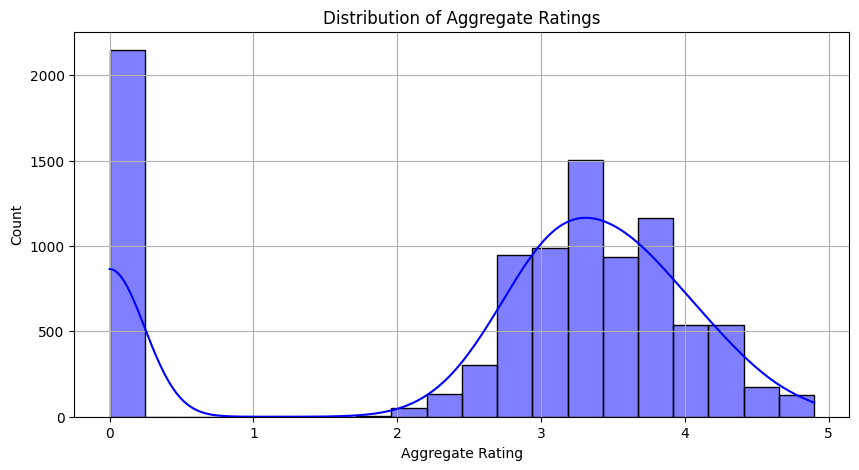

In [61]:
# Distribution of Aggregate Rating

plt.figure(figsize=(10, 5))
sns.histplot(dataset["Aggregate rating"], bins=20, kde=True, color="blue")
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [63]:
# Checking for Class Imbalance
rating_counts = dataset["Aggregate rating"].value_counts()
print("\nRating Counts:\n", rating_counts)


Rating Counts:
 Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


# Task 2 : Descriptive Analysis

# Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [67]:
# Basic Statistical Measures for Numerical Columns

print("\nBasic Statistics:\n", dataset.describe())


Basic Statistics:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000 

# Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines".


In [73]:
# Distribution of Categorical Variables

print("\nCountry Code Distribution:\n", dataset["Country Code"].value_counts())
print("\nCity Distribution:\n", dataset["City"].value_counts())
print("\nCuisines Distribution:\n", dataset["Cuisines"].value_counts().head(10))


Country Code Distribution:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

City Distribution:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

Cuisines Distribution:
 Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       14

# Identify the top cuisines and cities with the highest number of restaurants.

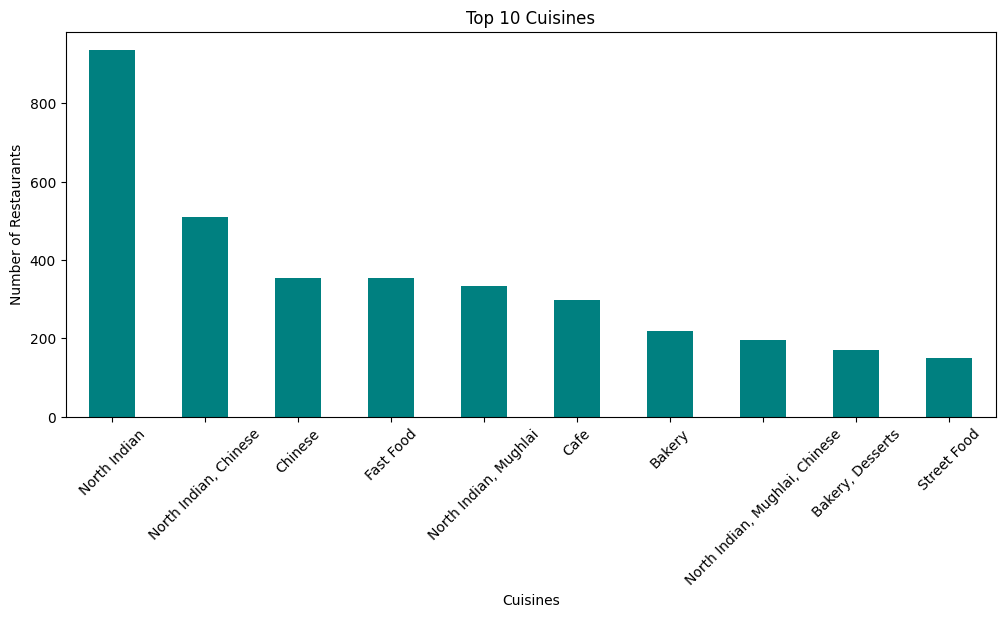

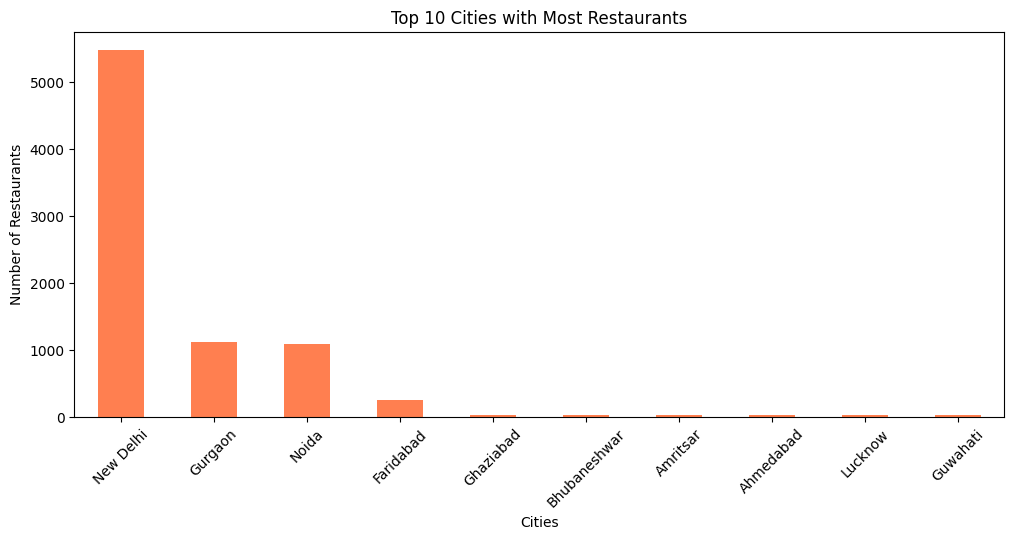

In [83]:
# Identifying Top Cuisines & Cities with Highest Restaurants

top_cuisines = dataset["Cuisines"].value_counts().head(10)
top_cities = dataset["City"].value_counts().head(10)

plt.figure(figsize=(12, 5))
top_cuisines.plot(kind='bar', color='teal')
plt.title("Top 10 Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
top_cities.plot(kind='bar', color='coral')
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Cities")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

# Task 3 : Geospatial Analysis

# Visualize the locations of restaurants on a map using latitude and longitude information.


In [93]:
# Filtering valid coordinates

dataset_geo = dataset.dropna(subset=["Latitude", "Longitude"])

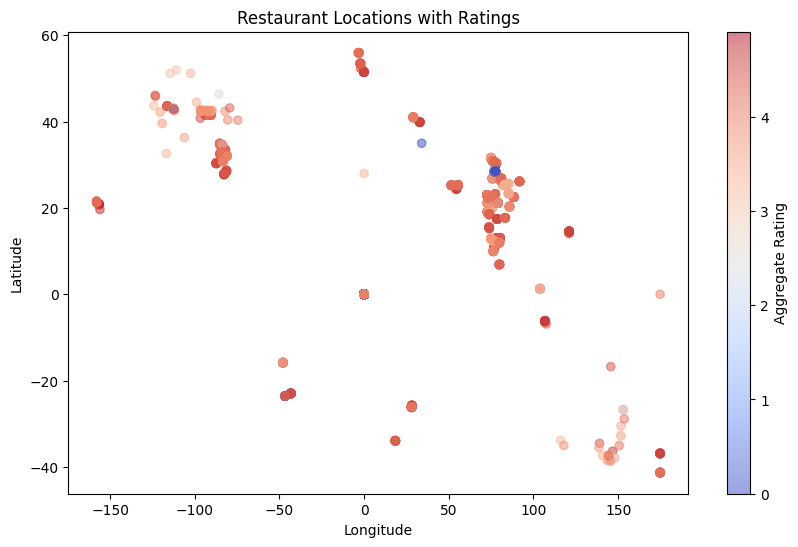

In [123]:
# Scatter Plot for Map
plt.figure(figsize=(10, 6))
plt.scatter(dataset_geo["Longitude"], dataset_geo["Latitude"], c=dataset_geo["Aggregate rating"], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Aggregate Rating')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations with Ratings")
plt.show()

# Analyze the distribution of restaurants across different cities or countries.

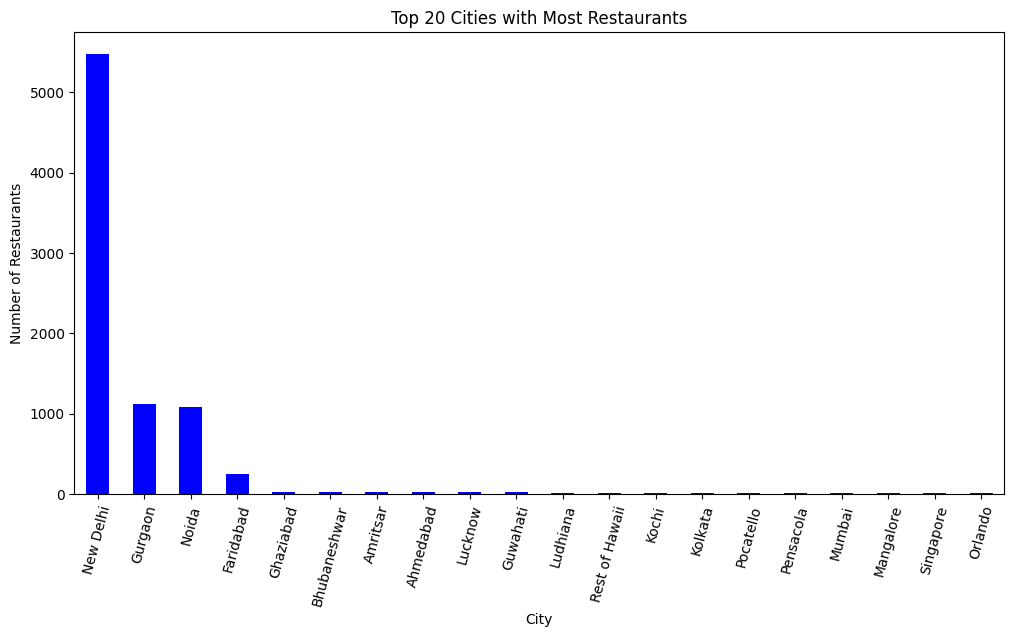

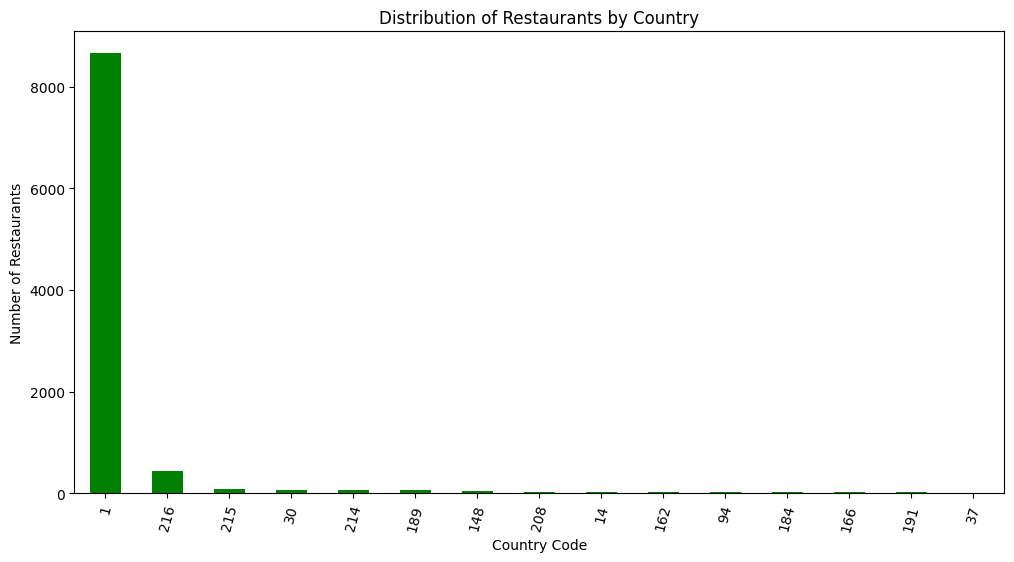

In [129]:
# Distribution of Restaurants Across Cities and Countries
plt.figure(figsize=(12, 6))
dataset["City"].value_counts().head(20).plot(kind='bar', color='blue')
plt.title("Top 20 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=75)
plt.show()

plt.figure(figsize=(12, 6))
dataset["Country Code"].value_counts().plot(kind='bar', color='green')
plt.title("Distribution of Restaurants by Country")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=75)
plt.show()


# Determine if there is any correlation between the restaurant's location and its rating.


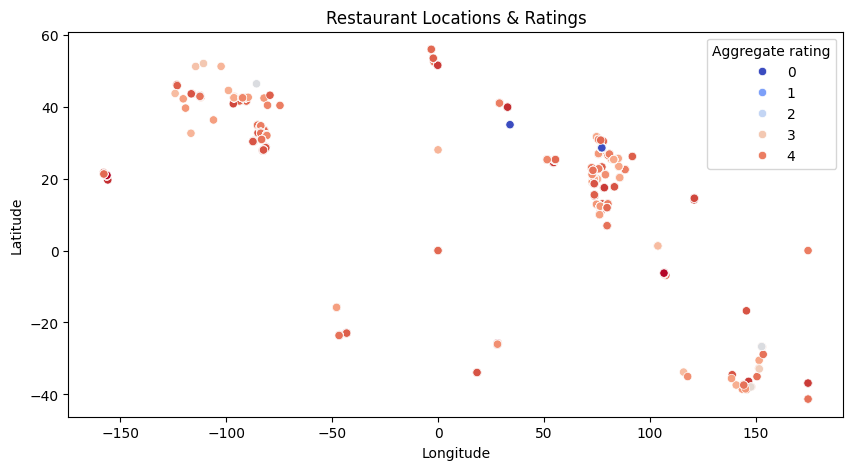

In [121]:
# Correlation Analysis (Location vs Rating)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset_geo["Longitude"], y=dataset_geo["Latitude"], hue=dataset_geo["Aggregate rating"], palette="coolwarm")
plt.title("Restaurant Locations & Ratings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
